# Alignment Visualization

The aim of this notebook is to create a general representation of a 1 vs. 1 alignment. With this representation, we can see the alignment of two sequences in a more intuitive way. The idea of the chart is to create a line per each species, with its aligned blocks matching with the other species aligned part.  


Taking the output data file \*blocks.csv, a *broken barh* chart is created builded with matplotlib package.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as n

import sys
 
# setting path
sys.path.append('../')

import swco

## Data Load

In [2]:
output = '../../Data/Results/Alignment_Visualization/'

timestamp = '20230306_093245'
# human vs gorilla
#blocks = pd.read_csv('../../Data\S_W_Intermediate\/Scaffold/Human_Gorilla/' + timestamp + '/blocks.csv')

# human vs gorilla & gorilla vs mouse
blocks = pd.read_csv('../../Data/Intermediate\/blocks_human_gorilla_mouse.csv', sep=';')
blocks

,species_scaffold,target_scaffold,alignment_id,start,stop,match_perc
0,human_NC_000001.11,NC_000001.11,1,925942.0,247448504.0,0.743791
1,Gorilla_NC_018424.2,NC_000001.11,1,557936.0,227509961.0,0.743791
2,human_NC_000019.10,NC_000019.10,2,281388.0,58571389.0,0.733333
3,Gorilla_NC_018443.2,NC_000019.10,2,54340.0,57915134.0,0.733333
4,human_NC_000002.12,NC_000002.12,3,111799586.0,241873274.0,0.783379
...,...,...,...,...,...,...
197,Mouse_NC_000083.6,NC_018442.2,101,57204013.0,57228035.0,0.500000
198,gorilla_NC_018445.2,NC_018445.2,103,8847869.0,8872748.0,1.000000
199,Mouse_NC_000082.6,NC_018445.2,103,97865870.0,97922315.0,1.000000
200,gorilla_NC_018445.2,NC_018445.2,104,8847869.0,8872748.0,1.000000


In [3]:
blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species_scaffold  202 non-null    object 
 1   target_scaffold   202 non-null    object 
 2   alignment_id      202 non-null    int64  
 3   start             202 non-null    float64
 4   stop              202 non-null    float64
 5   match_perc        202 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.6+ KB


In [4]:
# Redefine the start and stop columns as integers
blocks.start = blocks.start.astype('int64')
blocks.stop = blocks.stop.astype('int64')

# Set match_perc as percentage format with 2 decimals
blocks.match_perc = blocks.match_perc.astype('float64')
blocks.match_perc = blocks.match_perc.apply(lambda x: '{:.2%}'.format(x))

# Separate species and scaffold from species_scaffold field
blocks['species'] = blocks['species_scaffold'].str.split(pat='_').str[0].str.capitalize()
blocks['scaffold'] = blocks['species_scaffold'].str.split(pat='_', n=1).str[1].str.upper()

blocks.head()

,species_scaffold,target_scaffold,alignment_id,start,stop,match_perc,species,scaffold
0,human_NC_000001.11,NC_000001.11,1,925942,247448504,74.38%,Human,NC_000001.11
1,Gorilla_NC_018424.2,NC_000001.11,1,557936,227509961,74.38%,Gorilla,NC_018424.2
2,human_NC_000019.10,NC_000019.10,2,281388,58571389,73.33%,Human,NC_000019.10
3,Gorilla_NC_018443.2,NC_000019.10,2,54340,57915134,73.33%,Gorilla,NC_018443.2
4,human_NC_000002.12,NC_000002.12,3,111799586,241873274,78.34%,Human,NC_000002.12


In [5]:
df_scaffold_length = pd.read_csv('../../Data/Intermediate\df_scaffold_length.csv')
df_scaffold_length.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/Intermediate\\df_scaffold_length.csv'

In [ ]:
# Add the scaffold longitud to the blocks dataframe

# Capitalize species_scaffold names for doing the merge correctly
blocks.species_scaffold = blocks.species_scaffold.str.capitalize()

# Create a new column with the species and scaffold name for proper merging and capitalize it
df_scaffold_length['species_scaffold'] = df_scaffold_length.Specie + '_' + df_scaffold_length['Replicon Accession']
df_scaffold_length.species_scaffold = df_scaffold_length.species_scaffold.str.capitalize()

blocks = pd.merge(blocks, df_scaffold_length[['species_scaffold', 'Stop']], left_on='species_scaffold', right_on='species_scaffold', how='left')
blocks.rename(columns={'Stop': 'scaffold_length'}, inplace=True)
blocks.info()

del df_scaffold_length

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   species_scaffold  202 non-null    object
 1   target_scaffold   202 non-null    object
 2   alignment_id      202 non-null    int64 
 3   start             202 non-null    int64 
 4   stop              202 non-null    int64 
 5   match_perc        202 non-null    object
 6   species           202 non-null    object
 7   scaffold          202 non-null    object
 8   scaffold_length   202 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
import pandas as pd
length = pd.read_feather('../../Data/Intermediate/replicon_accession_length.feather',)

In [ ]:
length

,replicon_accession,length,start,stop
0,NC_000001.11,21757,65565,248930126
1,NC_000002.12,16439,41608,241900369
2,NC_000003.12,12589,319777,198038667
3,NC_000004.12,8282,53489,190175198
4,NC_000005.10,9437,92232,181368225
...,...,...,...,...
5590,NW_026041599.1,46,116055,501685
5591,NW_026041621.1,13,423515,467986
5592,NW_026041720.1,130,9192,141926
5593,NW_026041731.1,1,141890,142543


For creating the *broken barh* chart, is required a start and a length of the block. Hence, let us create that field based on the start and end difference of the blocks.  

Moreover, in order to create a line per species each species will have one assigned id.  

Later on, we will create a dictionary with the species as key and the (start, length) tuple as a value. Observe that the species name is included in *species_scaffold* field, therefore we will split it, creating the species and the scaffold column.

Finally, we will create a list of tuples with the id of the species and the length of the block.  


In [ ]:
# test
#blocks = blocks[0:6]

In [ ]:
'''def recalculate_start_stop(blocks):
    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority
    blocks.reset_index(inplace=True, drop=True)

    # A new variable is needed to keep the original stop value and 
    # update the stop and start values by the same amount
    for i in range(1,len(blocks)):
        prev_stop =  blocks.loc[i-1, 'stop']

        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:
            blocks.loc[i, 'stop'] += prev_stop
            blocks.loc[i, 'start'] += prev_stop

    return blocks'''

"def recalculate_start_stop(blocks):\n    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority\n    blocks.reset_index(inplace=True, drop=True)\n\n    # A new variable is needed to keep the original stop value and \n    # update the stop and start values by the same amount\n    for i in range(1,len(blocks)):\n        prev_stop =  blocks.loc[i-1, 'stop']\n\n        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:\n            blocks.loc[i, 'stop'] += prev_stop\n            blocks.loc[i, 'start'] += prev_stop\n\n    return blocks"

In [ ]:
def recalculate_start_stop(blocks):
    # Sort values for proper iteration
    blocks.sort_values(['species', 'scaffold'], inplace=True) # or alignment_id, depend on order priority
    blocks.reset_index(inplace=True, drop=True)

    # A new variable is needed to keep the original stop value and 
    # update the stop and start values by the same amount
    prev_stop = 0
    for i in range(1,len(blocks)):

        if blocks.loc[i, 'species'] == blocks.loc[i-1, 'species']:
            if blocks.loc[i, 'species_scaffold'] != blocks.loc[i-1, 'species_scaffold']:
                prev_stop =  blocks.loc[i-1, 'scaffold_length']

            blocks.loc[i, 'stop'] += prev_stop
            blocks.loc[i, 'start'] += prev_stop
            blocks.loc[i, 'scaffold_start'] = prev_stop
            blocks.loc[i, 'scaffold_length'] += prev_stop
    
    blocks.rename(columns={'scaffold_length': 'scaffold_stop'}, inplace=True)

    # Substitute nan values to 0
    blocks.scaffold_start.fillna(0, inplace=True)
    
    #blocks.scaffold_stop = blocks.scaffold_stop.astype('int64')
    #blocks.scaffold_start = blocks.scaffold_start.astype('int64')
    
    #return blocks

# Sort blocks table by the desired order of the species
def assign_species_id(order, blocks=blocks):

    # Create a new column with the desired order
    blocks['species_ordered'] = pd.Categorical(blocks['species'], categories=order, ordered=True)

    
    # get the category codes (i.e. IDs) for each entry in the ordered column
    blocks['species_id'] = blocks['species_ordered'].cat.codes
    blocks['species_id'] = blocks['species_id'].astype('int64')

In [ ]:
'''class Alignment:
    def __init__(self, blocks, order):
        self.blocks = blocks
        self.order = order
        self.species_id = assign_species_id(self.order, self.blocks)
        self.blocks = recalculate_start_stop(self.blocks)
        self.blocks['target_scaffold_id'] = (self.blocks
                                             .sort_values('alignment_id')
                                             .reset_index()
                                             .groupby('target_scaffold')
                                             .ngroup())
        self.blocks['target_scaffold_id'] = self.blocks['target_scaffold_id'].astype('int64')'''
        
        

"class Alignment:\n    def __init__(self, blocks, order):\n        self.blocks = blocks\n        self.order = order\n        self.species_id = assign_species_id(self.order, self.blocks)\n        self.blocks = recalculate_start_stop(self.blocks)\n        self.blocks['target_scaffold_id'] = (self.blocks\n                                             .sort_values('alignment_id')\n                                             .reset_index()\n                                             .groupby('target_scaffold')\n                                             .ngroup())\n        self.blocks['target_scaffold_id'] = self.blocks['target_scaffold_id'].astype('int64')"

In [ ]:
# Separate species and scaffold from species_scaffold field
blocks['species'] = blocks['species_scaffold'].str.split(pat='_').str[0].str.capitalize()
blocks['scaffold'] = blocks['species_scaffold'].str.split(pat='_', n=1).str[1].str.upper()

# Create the id for the species sorted in the order we would like with the help of species_order function
assign_species_id(['Human', 'Gorilla', 'Mouse'])

# Create the id for the target scaffold
blocks['target_scaffold_id'] = blocks.sort_values('alignment_id').reset_index().groupby('target_scaffold').ngroup()

recalculate_start_stop(blocks)

# Create length column
blocks['length'] = blocks['stop'] - blocks['start']

# Create a tuple of the start and length of each block
blocks['start_length'] = blocks.apply(lambda x: (x.start, x.length), axis=1)

# Create a dictionary where the key is the alignment_id and the value is the array of tuples, including the species_id
blocks.sort_values(['alignment_id', 'species_id'], ascending=True, inplace=True)
blocks_dict = blocks.groupby('alignment_id')[['start_length', 'species_id', 'scaffold', 'match_perc', 'scaffold_stop']].apply(lambda x: x.values.tolist()).to_dict()

In [ ]:
blocks_dict

{1: [[(925942, 246522562), 0, 'NC_000001.11', '74.38%', 248918363],
  [(557936, 226952025), 1, 'NC_018424.2', '74.38%', 228886650]],
 2: [[(2650249377, 58290001), 0, 'NC_000019.10', '73.33%', 2708539378],
  [(2581142277, 57860794), 1, 'NC_018443.2', '73.33%', 2639003071]],
 3: [[(360717949, 130073688), 0, 'NC_000002.12', '78.34%', 490791637],
  [(336705494, 134937622), 1, 'NC_018426.2', '78.34%', 471643116]],
 4: [[(343944156, 16102958), 0, 'NC_000002.12', '62.67%', 490791637],
  [(229211502, 15859393), 1, 'NC_018425.2', '62.67%', 336402775]],
 5: [[(1807336871, 134199795), 0, 'NC_000011.10', '70.52%', 1941536666],
  [(1790338405, 134564549), 1, 'NC_018435.2', '70.52%', 1924902954]],
 6: [[(2486773507, 15292797), 0, 'NC_000017.11', '79.36%', 2569720641],
  [(2407290241, 15716620), 1, 'NC_018441.2', '79.36%', 2503087023]],
 7: [[(491111414, 197718890), 0, 'NC_000003.12', '79.73%', 688961489],
  [(471959067, 201022622), 1, 'NC_018427.2', '79.73%', 672981689]],
 8: [[(1060829537, 17025980

## Create color map
Create color map where every block have different colors unless one block is part of another block.

The aim is to create a proper coloring system where a first coloring is set for the base species. Then, the realted blocks of other species will be colored with the same color. Other blocks will be colored with a different color. 

In [ ]:
# Prepare the necessary data
blocks.sort_values(['alignment_id', 'species_id'], inplace=True)
df_alignments = blocks[['alignment_id', 'target_scaffold', 'start', 'stop']].groupby('alignment_id', as_index=False).first()

In [ ]:
# define recursive function to find the origin scaffold, i.e., if the block is a part of a previous block, find the origin block
def find_origin(alignment_id, target_scaffold, start, stop):

    # Find the previous rows in the dataframe that have a scaffold that is present in the current scaffold
    prev_rows = blocks.loc[(blocks['alignment_id'] < alignment_id) & (target_scaffold in (blocks.loc[blocks['alignment_id'] <= alignment_id, 'scaffold'].tolist()))]

    # If there are no previous rows, return the current alignment_id (the origin is itself)
    if len(prev_rows) == 0: return alignment_id

    # Loop through the previous rows and check if each one contains the current scaffold in the correct frame
    for i, row in prev_rows.iterrows():
        if (target_scaffold == row['scaffold']) and (row['start'] <= start) and (stop <= row['stop']):
            # Call the find_origin function recursively with the values of the previous row
            return find_origin(row['alignment_id'], row['target_scaffold'], row['start'], row['stop'])

    # If no row is found, return the current alignment_id (the origin is itself)
    return alignment_id

In [ ]:
'''# Create a color mapping per each alignment_id
# Create a dictionary where the key is the alignment_id and the value is the color
# The color should be a tuple of RGB values
# I want to create a color mapping that is different for each target_scaffold
# If a target_scaffold has multiple alignment_ids, then the color mapping should be the same for all of them
# We need to map each target_scaffold to a integer value
# For doing so, first I choose a color map and then I normalize the values of the target_scaffold

# source for different color mappings: https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative
cmap = mpl.cm.prism # mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=blocks['alignment_id'].min(), vmax=blocks['alignment_id'].max())
color_mapping = dict(zip(blocks['alignment_id'], cmap(norm(blocks['alignment_id']))))'''

"# Create a color mapping per each alignment_id\n# Create a dictionary where the key is the alignment_id and the value is the color\n# The color should be a tuple of RGB values\n# I want to create a color mapping that is different for each target_scaffold\n# If a target_scaffold has multiple alignment_ids, then the color mapping should be the same for all of them\n# We need to map each target_scaffold to a integer value\n# For doing so, first I choose a color map and then I normalize the values of the target_scaffold\n\n# source for different color mappings: https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative\ncmap = mpl.cm.prism # mpl.cm.viridis\nnorm = mpl.colors.Normalize(vmin=blocks['alignment_id'].min(), vmax=blocks['alignment_id'].max())\ncolor_mapping = dict(zip(blocks['alignment_id'], cmap(norm(blocks['alignment_id']))))"

In [ ]:
# apply find_origin function to each row and create new column with origins
df_alignments['origin_alignment_id'] = df_alignments.apply(lambda row: find_origin(row['alignment_id'], row['target_scaffold'], row['start'], row['stop']), axis=1)

# Now, let us apply a color mapping to origin_alignment_id 
# First, we have to define the color mapping per each origin_alignment_id
# We can do this by creating a dictionary where the key is the origin_alignment_id and the value is the color
# The color should be a tuple of RGB values
cmap = mpl.cm.prism # mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=df_alignments['origin_alignment_id'].min(), vmax=df_alignments['origin_alignment_id'].max())
color_mapping = dict(zip(df_alignments['origin_alignment_id'], cmap(norm(df_alignments['origin_alignment_id']))))

# Now, we can apply the color mapping to the origin_alignment_id
df_alignments['color'] = df_alignments['origin_alignment_id'].map(color_mapping)

# Now, we want the dictionary of alignment and color
color_mapping = df_alignments.set_index('alignment_id')['color'].to_dict()
color_mapping


{1: array([1., 0., 0., 1.]),
 2: array([1.        , 0.12964542, 0.        , 1.        ]),
 3: array([1.        , 0.69091033, 0.        , 1.        ]),
 4: array([0.88898422, 1.        , 0.        , 1.        ]),
 5: array([0.32621812, 0.99656884, 0.        , 1.        ]),
 6: array([0.0425111 , 0.74080127, 0.22472456, 1.        ]),
 7: array([0.        , 0.18628862, 0.91244623, 1.        ]),
 8: array([0.24310366, 0.        , 1.        , 1.        ]),
 9: array([0.79462101, 0.        , 0.6377615 , 1.        ]),
 10: array([1.        , 0.        , 0.11363345, 1.        ]),
 11: array([1.        , 0.24287933, 0.        , 1.        ]),
 12: array([1.        , 0.78748685, 0.        , 1.        ]),
 13: array([0.77636196, 1.        , 0.        , 1.        ]),
 14: array([0.39691603, 1.        , 0.        , 1.        ]),
 15: array([0.        , 0.63968807, 0.38723723, 1.        ]),
 16: array([0.        , 0.07507738, 0.99588602, 1.        ]),
 17: array([0.34274503, 0.        , 1.        , 1

## Scaffold information
Now, we would like to represent the scaffold information, instead of each aligned block inside of them. Therefore, we will create a new dataframe with the scaffold information, which contains the start and end of the scaffold, and the species_id, so this information can be painted in the correct y-axis value.

In [ ]:
# Create a unique dataframe with the scaffold name, species and the maximum start and stop values
scaffold_info = blocks.groupby(['scaffold', 'species_id'], as_index=False)[['scaffold_start', 'scaffold_stop']].max()

# Convert it to a dictionary
scaffold_info_dict = scaffold_info.set_index('scaffold').T.to_dict('list')
scaffold_info_dict

{'NC_000001.11': [0.0, 0.0, 248918363.0],
 'NC_000002.12': [0.0, 248918363.0, 490791637.0],
 'NC_000003.12': [0.0, 490791637.0, 688961489.0],
 'NC_000004.12': [0.0, 688961489.0, 879136537.0],
 'NC_000005.10': [0.0, 879136537.0, 1060504762.0],
 'NC_000006.12': [0.0, 1060504762.0, 1231089343.0],
 'NC_000007.14': [0.0, 1231089343.0, 1390234114.0],
 'NC_000008.11': [0.0, 1390234114.0, 1535288271.0],
 'NC_000009.12': [0.0, 1535288271.0, 1673522077.0],
 'NC_000010.11': [0.0, 1673522077.0, 1807148819.0],
 'NC_000011.10': [0.0, 1807148819.0, 1941536666.0],
 'NC_000012.12': [0.0, 1941536666.0, 2074771022.0],
 'NC_000013.11': [0.0, 2074771022.0, 2189097303.0],
 'NC_000014.9': [0.0, 2189097303.0, 2294627097.0],
 'NC_000015.10': [0.0, 2294627097.0, 2396550156.0],
 'NC_000016.10': [0.0, 2396550156.0, 2486626066.0],
 'NC_000017.11': [0.0, 2486626066.0, 2569720641.0],
 'NC_000018.10': [0.0, 2569720641.0, 2649967989.0],
 'NC_000019.10': [0.0, 2649967989.0, 2708539378.0],
 'NC_000020.11': [0.0, 2708539

# Plot

## First option
One name appearance per scaffold

Text(0.5, 1.0, 'Alignment of Human vs. Gorilla vs. Mouse specifying % of matching genes in aligned blocks')

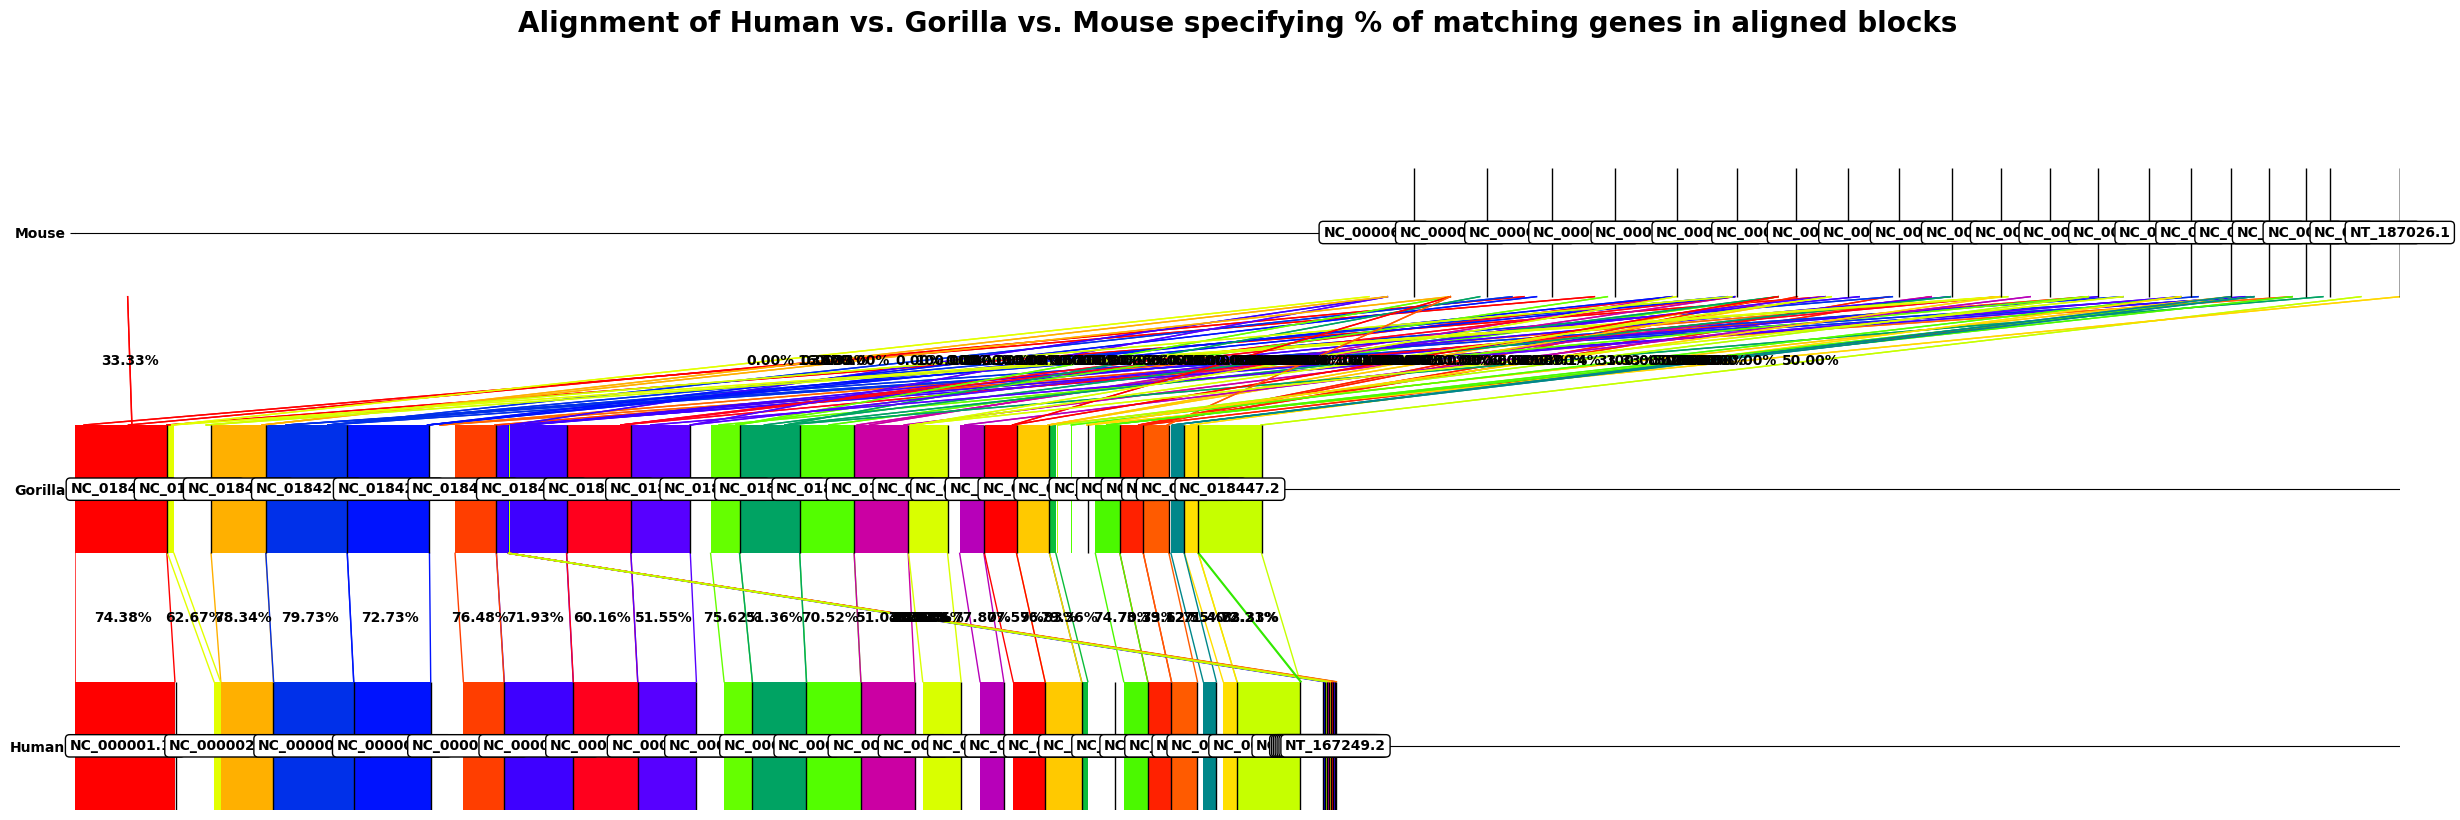

In [37]:
# Start plotting
fig, ax = plt.subplots()

# Define plot size
fig.set_size_inches(30, 10)

# Each key is an alignment_id, which determines the color of the bar
# Each block is represented per species, so we need a y-level per each species
# The y-level is determined by the species_id
# The x-level is determined by the start and length of the block
for key, value in blocks_dict.items():
        for i in value:
                # Draw the block
                ax.broken_barh([i[0]],  # start and length x-axis
                                (i[1], 0.5),            # start and height y-axis
                                facecolors=color_mapping[key], # = target_scaffold; key, if we want per alignment
                                zorder=2)

        # Add a line between the blocks for each alignment_id
        # The start positions of each block are connected by a line
        ax.plot([value[1][0][0], value[0][0][0]],
                [value[1][1], value[0][1] + 0.5],
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)

        # The end (= start + length) positions of each block are connected by a line
        ax.plot([value[1][0][0] + value[1][0][1], value[0][0][0] + value[0][0][1]],
                [value[1][1], value[0][1] + 0.5], #[1, 0.5], #[i[1] for i in value], 
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)
        
        # Set match_perc KPI between the two lines
        # First, compute the middle of the two lines for the x-axis
        mid_bottom_block_pos = (value[0][0][0] + (value[0][0][0] + value[0][0][1])) / 2 
        mid_top_block_pos = (value[1][0][0] + (value[1][0][0] + value[1][0][1])) / 2
        in_between = (mid_top_block_pos + mid_bottom_block_pos) / 2

        # Insert the text
        ax.text(x=in_between, # + (value[1][0][0] + (value[1][0][0] + value[1][0][1]) / 2)) / 2,
                y=value[0][1]+0.75,
                s=value[1][3],
                ha='center',
                va='center',
                fontsize=10,
                weight='bold',
                rotation='horizontal')

ax.set_ylim(0, blocks.species.nunique())
ax.set_xlim(min(blocks.start) - 1000, max(blocks.stop) + 1000)
#ax.set_xlabel('Genomic position')

# Make grid lines visible
ax.grid(True, axis='y', linestyle='-', color='black')

# Hide axes
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Set tick labels
ax.set_yticks([i + 0.25 for i in blocks.species_id.unique()], labels=blocks.species.unique())
ax.set_xticks([])

# With the help of scaffold_info_dict, we can draw a vertical line for each scaffold and its name
for key, value in scaffold_info_dict.items():
        # Draw the line
        plt.vlines(x=value[2], ymin=value[0], ymax=value[0]+0.5, color='black', linestyle='-', linewidth=1)
        
        # Write the name of the scaffold in each aligned block between a box
        # Create the box object
        box = dict(boxstyle='round', facecolor='white', alpha=1)

        ax.text(x=(value[1] + value[2])/2,
                y=value[0]+0.25,
                s=key,
                ha='center',
                va='center',
                rotation='horizontal',
                bbox=box)
                
# Add a title
ax.set_title('Alignment of Human vs. Gorilla vs. Mouse specifying % of matching genes in aligned blocks', fontsize=20)


In [38]:
fig.savefig(output + 'alignment_human_gorilla_mouse.svg', format='svg', dpi=1200)

## Second option
One name appearance per each aligned block

Text(0.5, 1.0, 'Alignment of Human vs. Gorilla specifying % of matching genes in aligned blocks')

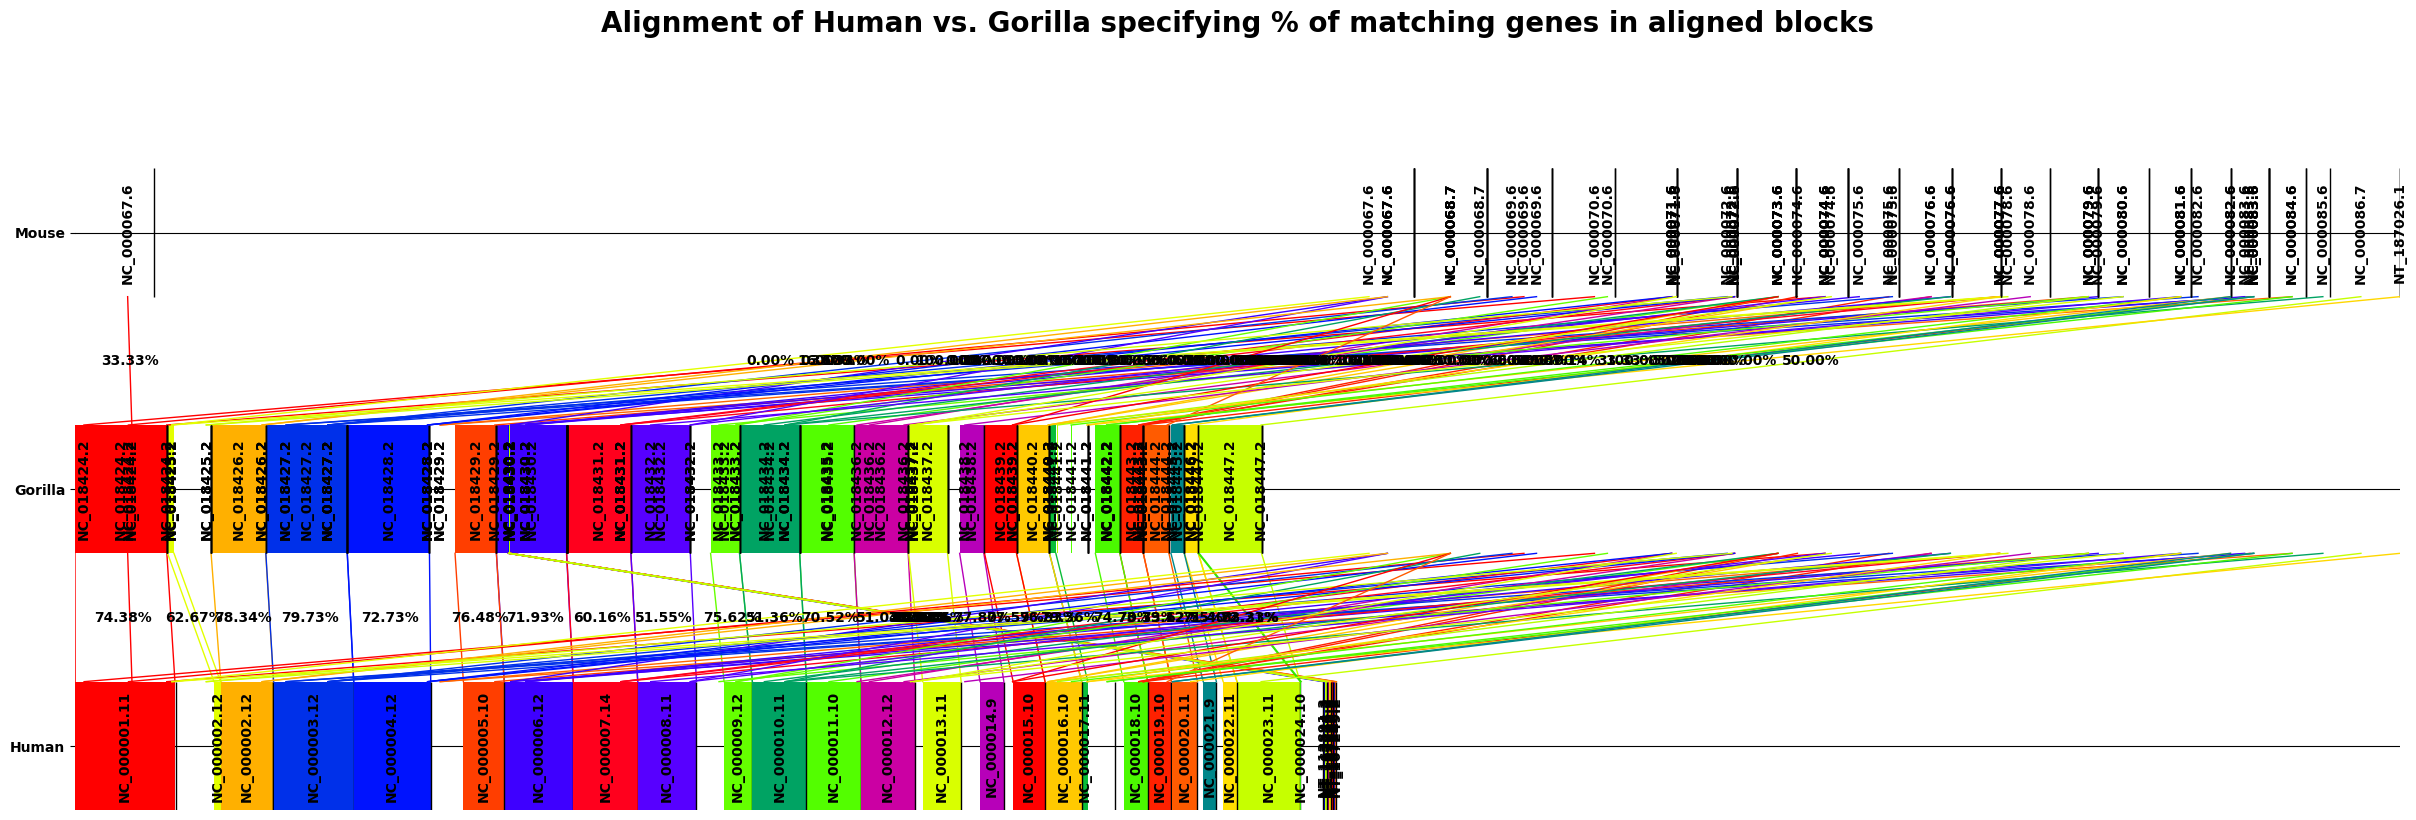

In [39]:
# Start plotting
fig, ax = plt.subplots()
 
# Define plot size
fig.set_size_inches(30, 10)

# Each key is an alignment_id, which determines the color of the bar
# Each block is represented per species, so we need a y-level per each species
# The y-level is determined by the species_id
# The x-level is determined by the start and length of the block
for key, value in blocks_dict.items():
        for i in value:
                # Draw the block
                ax.broken_barh([i[0]],  # start and length x-axis
                                (i[1], 0.5),            # start and height y-axis
                                facecolors=color_mapping[key], # = target_scaffold; key, if we want per alignment
                                zorder = 2)

                # Write the name of the scaffold in each aligned block
                ax.text(x=(i[0][0] + (i[0][0] + i[0][1])) / 2,
                        y=i[1] + 0.25,
                        s=i[2],
                        ha='center',
                        va='center',
                        fontsize=10,
                        weight='bold',
                        rotation='vertical')

                # Draw a line limitating each scaffold
                plt.vlines(x=i[4], ymin=i[1], ymax=i[1]+0.5, color='black', linestyle='-', linewidth=1)

        # Add a line between the blocks for each alignment_id
        # The start positions of each block are connected by a line
        ax.plot([value[1][0][0], value[0][0][0]],
                [value[1][1], value[0][1] + 0.5],
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)

        # The end (= start + length) positions of each block are connected by a line
        ax.plot([value[1][0][0] + value[1][0][1], value[0][0][0] + value[0][0][1]],
                [1, 0.5], #[i[1] for i in value], 
                color=color_mapping[key], 
                linestyle='-', 
                linewidth=1)
                
        # Set match_perc KPI between the two lines
        # First, compute the middle of the two lines for the x-axis
        mid_bottom_block_pos = (value[0][0][0] + (value[0][0][0] + value[0][0][1])) / 2 
        mid_top_block_pos = (value[1][0][0] + (value[1][0][0] + value[1][0][1])) / 2
        
        in_between = (mid_top_block_pos + mid_bottom_block_pos) / 2

        # Insert the text
        ax.text(x=in_between, # + (value[1][0][0] + (value[1][0][0] + value[1][0][1]) / 2)) / 2,
                y=value[0][1]+0.75,
                s=value[1][3],
                ha='center',
                va='center',
                fontsize=10,
                weight='bold',
                rotation='horizontal')

# Set tick labels
ax.set_yticks([i + 0.25 for i in blocks.species_id.unique()], labels=blocks.species.unique())
ax.set_xticks([])

ax.set_ylim(0, blocks.species.nunique())
ax.set_xlim(min(blocks.start) - 1000, max(blocks.stop) + 1000)
#ax.set_xlabel('Genomic position')

# Make grid lines visible
ax.grid(True, axis='y', linestyle='-', color='black')

# Hide axes
for key, spine in ax.spines.items():
    spine.set_visible(False)

# Add a title
ax.set_title('Alignment of Human vs. Gorilla specifying % of matching genes in aligned blocks', fontsize=20)


In [40]:
blocks.to_csv('../../Data/Intermediate/blocks_huma_gorilla_mouse_processed.csv', index=False)